<a href="https://www.kaggle.com/code/nizarkarkar/cat-vs-dog-with-details?scriptVersionId=96998067" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats-redux-kernels-edition/sample_submission.csv
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train.zip
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test.zip


I'm using in this competition CNN.First of all let's understand what is CNN ?.In deep learning, a convolutional neural network (CNN/ConvNet) is a class of deep neural networks, most commonly applied to analyze visual imagery.CNN is used to classify images or identify patterns between them 

To begin with we extract the data from the Zipped files in order to train our model.In deep learning, a convolutional neural network (CNN/ConvNet) is a class of deep neural networks, most commonly applied to analyze visual imagery.CNN is mainly used to recognize pattern betwwen images and classify them.As images move through a convolutional network, different patterns are recognised just like a normal neural network. But here rather than focussing on one pixel at a time, a convolutional net takes in square patches of pixels and passes them through a filter. That filter is also a square matrix smaller than the image itself, and equal in size to the patch. It is also called a kernel.

I used for this competition basic CNN model to classify images of cats and dogs .So first of let's define what is CNN technique.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

import zipfile

with zipfile.ZipFile("../input/dogs-vs-cats-redux-kernels-edition/train.zip","r") as z:
    z.extractall(".")
    
with zipfile.ZipFile("../input/dogs-vs-cats-redux-kernels-edition/test.zip","r") as z:
    z.extractall(".")

['dogs-vs-cats-redux-kernels-edition']


After that we iterate throw all images in train folder and then we split our images into two categories one for dog's images and the other for the cat'images 
to make our model learn better we will refere to dag for 1 and the cat for zeros .
Now every image is actually a set of pixels so how to get our computer know that. Its simple convert all those pixels into an array. So we are going to use here a cv2 library to read our image into an array and also it will read as a gray scale image.

cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)

Now we have got here images of all sizes . We have landscape, portrait etc etc.. We need to make them all of a single size so it can be analysed pretty easily. How to do that very very simple again. Use cv2

cv2.resize(img_array, dsize=(80, 80))

Ok so we have got image array and its resized but do you believe whatever I just did was correct. Was the resizing of 80 X 80 good or is it bad. Should check it. How can we do that. There is one answer matplotlib. Using the below code we can display the image.

plt.imshow(new_img_array,cmap="gray")

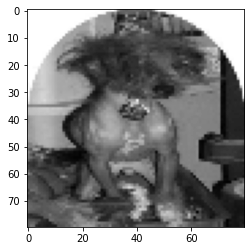

In [3]:
main_dir = "/kaggle/working/"
train_dir = "train"
path=os.path.join(main_dir,train_dir)
for p in os.listdir(path):
    category=p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array=cv2.resize(img_array,dsize=(80,80))
    plt.imshow(new_img_array,cmap='gray')
    break 

Then we declare our training array X and target Y .X will be the array of pixels and Y the array of 0 and 1 . It similar to a classic classification problem

In [4]:
X=[]
y=[]
convert=lambda category:int(category=='dog')
for p in os.listdir(path):
    category=p.split('.')[0]
    category=convert(category)
    img_array= cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array=cv2.resize(img_array,dsize=(80,80))
    X.append(new_img_array)
    y.append(category)
    

In [5]:
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)

We devide our training array toi 255 in order to make our model learn faster and more effecient .It's called scaling the training data 

In [6]:
X=X/255.0

Now let's pass to training our model following these steps 

Define a Sequential model
Start adding layers to it.
First we will add a Conv2D layer with 64 nodes and kernel size of (3,3). You can also experiment with different values here like 32, 128 etc. Also we have to specify input shape which is your X shape. Activation we will take 'relu' for now however there are many others to experiment with.
Now after every Conv layer we always do max pooling so we will add max pooling layer with a size of (2,2)
We will repeat this combination again because come on 2 is better than one. Haha. We you can also add 3 or more convolution layers but keep in mind the more layers you add more time it will take to train.
But we don't have much time so we will add a flatten layer now. As we have to feed our data to Dense layer later.
We will now add a Dense layer of 64 nodes. Note for all these layers we are using activation as 'relu' because I found results better with this. You can skip specifying activation but this might make a model a conveniently linear which might not work for us.
In the end for getting our result we will add final Dense layer . Activation can be sigmoid or softmax (if you need probability use sigmoid else use softmax). Here I have used sigmoid.
Finally we will compile the model . There are 3 things to mention here . Loss, Optimizer, Metrics
Loss :- To make our model better we either minimize loss or maximize accuracy. NN always minimize loss. To measure it we can use different formulas like 'categorical_crossentropy' or 'binary_crossentropy'. Here I have used binary_crossentropy

Optimizer :- If you know a lil bit about mathematics of machine learning you might be familier with local minima or global minima or cost function. To minimize cost function we use different methods For ex :- like gradient descent, stochastic gradient descent. So these are call optimizers. We are using a default one here which is adam

Metrics :- This is to denote the measure of your model. Can be accuracy or some other metric.

In [7]:
model=Sequential()

model.add(Conv2D(64,(3,3),activation='relu',input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
#add another
model.add(Conv2D(64,(3,3),activation='relu',input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
#Add a softmax layer with 10 output units
model.add(Dense(1,activation='sigmoid'))


model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

2022-05-30 10:56:14.739802: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


now we will fit our model to the training data 
epochs is how many times we train our model 
the more epochs we have the better result we will get 
but 10 epochs is enought because it takes too long to run 
Batch size :- How much amount of data at once you wanna pass through the model

validation_split :- How much amount of data (in this case its 20 %) you will need to check cross validation error



In [8]:
model.fit(X,y,epochs=10,batch_size=32,validation_split=0.2)

2022-05-30 10:56:16.271690: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
625/625 [==============================] - 101s 160ms/step - loss: 0.6614 - accuracy: 0.5956 - val_loss: 0.6108 - val_accuracy: 0.6738
Epoch 2/10
625/625 [==============================] - 101s 161ms/step - loss: 0.5742 - accuracy: 0.7013 - val_loss: 0.5385 - val_accuracy: 0.7328
Epoch 3/10
625/625 [==============================] - 103s 164ms/step - loss: 0.5122 - accuracy: 0.7458 - val_loss: 0.4941 - val_accuracy: 0.7626
Epoch 4/10
625/625 [==============================] - 103s 164ms/step - loss: 0.4564 - accuracy: 0.7835 - val_loss: 0.4781 - val_accuracy: 0.7720
Epoch 5/10
625/625 [==============================] - 115s 184ms/step - loss: 0.4032 - accuracy: 0.8172 - val_loss: 0.4711 - val_accuracy: 0.7830
Epoch 6/10
625/625 [==============================] - 111s 178ms/step - loss: 0.3380 - accuracy: 0.8526 - val_loss: 0.4823 - val_accuracy: 0.7814
Epoch 7/10
625/625 [==============================] - 102s 163ms/step - loss: 0.2675 - accuracy: 0.8891 - val_loss: 0.5318 -

Now we have to preprocess our test data also same as that our training data.

In [9]:
train_dir='test'
path=os.path.join(main_dir,train_dir)


X_test=[]
id_line=[]
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array=cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array=cv2.resize(img_array,dsize=(80,80))
        X_test.append(new_img_array)
        
create_test1_data(path)
X_test = np.array(X_test).reshape(-1,80,80,1)
X_test = X_test/255        
        

In [10]:
predictions=model.predict(X_test)

In [11]:
predicted_val = [int(round(p[0])) for p in predictions]

Now you have to make submission data frame to submit your resultset

In [12]:
submission_df=pd.DataFrame({'id':id_line,'label':predicted_val})

In [13]:
submission_df.to_csv("submission.csv",index=False)

In [14]:
submission_df

,id,label
0,3099,1
1,5992,1
2,2739,1
3,5939,0
4,10870,1
...,...,...
12495,3631,1
12496,5607,1
12497,10830,0
12498,1539,0
